# ST 445 Final Project
## Analysis of American Political Discourse using Twitter Data and Natural Language Processing
### Candidate Number: 41294

## Part 1: Introduction

The United States, much like the world at large, is going through a particularly divisive time in its history. It feels as though every headline heralds bad news that will make someone in our community enraged or despondent. With this bleak perceived reality, I sought to determine whether there is any sign of intercommunication or shared concern between Americans of different backgrounds, as well as the tone of their discussions, using data from public Twitter accounts with respect to political topics.

While there are many possible topics that could be observed, I chose #ImmigrationReform as I thought it was a more neutral hashtag--with users who identify both as Republican and Democrat--compared to one that concerned #ImpeachTrump or #Trump2020 which would likely have a bias towards one political party over another. As one of the goals of this study is to see discussions by people from different backgrounds, using a topic that unconsciously subsets the population according to political beliefs undermines the original purpose.

Additionally, while this project was being developed, the President of the United States was formally impeached. As the Twitter data was being scraped at this time, I thought the event presented an interesting opportunity to examine the tone of the official response by both the Republican Party or GOP (the party of the sitting President), and the Democratic Party (the party that has been pushing for his impeachment). Thus, as an additional component of examining the tone of political discourse, I examined the polarity of the GOP and Democrat official tweets on the day of impeachment using natural language processing.

### 1.1) Objectives

As such, the objectives for the study are as follows:
* Use the geotagged user data for #ImmigrationReform to analyze which locations are most concerned with, or at least discussing, this political topic. Additionally, whether the conversation mainly involves a similar region, or whether different parts of the country are involved in this national discussion. 
* Analyze the tone of the #ImmigrationReform discussion to determine whether it is a political topic that has been either positively or negatively charged in terms of its conversation among average Americans.
* Analyze the tone of the GOP and Democrat response to the impeachment news on December 18th, 2019 in order to study whether the two parties are diametrically opposed to one another with respect to this seemingly highly polarized issue.

### 1.2) Background on Data

The data for this project was directly scraped from Twitter using the Twitter API, with unique credentials contained in the twitter_credentials.json file. As Twitter allows geotagging of tweets while also filtering for specific hashtags or phrases, this data seemed most appropriate for gaining an understanding of whether different regions participate in the #ImmigrationReform debate. Additionally, as Twitter itself is a platform for communication and messaging, its data clearly provided a direct source of discussion between Americans that allows for natural language processing--specifically sentiment analysis--on various subjects. 



## Part 2: Data

### 2.1) Dataset for #ImmigrationReform Analysis

The final dataset for #ImmigrationReform was made up of roughly 130 observations, saved in the #ImmigrationReform_location_tweets.csv. Only original tweets were used, no retweets, and the location variable was determined from the user's account location rather than the geotagged location of the specific tweet referencing #ImmigrationReform. This was done as a relatively small number of Twitter users tag their geographic location for a single tweet; this, pared with access to only 1% of Twitter data through their API, gives only a small number of observations relevant to my search terms (sometimes only one result/tweet over several days). However, using the location assigned at the user profile does not run into this scarcity problem, and thus allowed me to build a larger dataset.

As such, the #ImmigrationReform data had columns for the text (original message), location, latitude, longitude and the general geographic region (which was added by hand) in the US the location falls in for all 130 observations.

### 2.2) Scraping the Twitter Data with Respect to #ImmigrationReform

In [1]:
#importing packages
import tweepy
import json
import twitter
import twython
import csv
import pandas as pd
import gmaps
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium import plugins
import warnings

#natural language processing of the tweets
from textblob import TextBlob

import plotly.graph_objects as go

import geoplot as gplt
import geoplot.crs as gcrs

#import package to transform tweets into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



In [2]:
# Load credentials from json file
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)

# Instantiate an object using tweepy for later list comprehension search
auth = tweepy.OAuthHandler(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
auth.set_access_token(creds['ACCESS_TOKEN'], creds['ACCESS_SECRET'])
api = tweepy.API(auth, wait_on_rate_limit=True)


In [3]:
#scraping 100 (non re)tweets with #ImmigrationReform
tweets = tweepy.Cursor(api.search, 
                           q='#ImmigrationReform -filter:retweets',
                           lang="en"
                           ).items(100)


The above code searches Twitter for up to 100 original tweets with #ImmigrationReform in its text, using the API credentials inputed from the json file.

### 2.3) Saving and Cleaning the Twitter GeoData

In [4]:
#only finding data where user location is populated
locs = [[tweet.text.encode("utf-8"), tweet.user.location] for tweet in tweets if tweet.user.location !='']
locs

[[b'@greg06897 @DanRiffle And they can\xe2\x80\x99t wrap their head around the fact that the US is failing it\xe2\x80\x99s citizens! \n\nIssues\xe2\x80\xa6 https://t.co/gDKN4VeIsc',
  '🌎'],
 [b'@CANCEL_SAM Poor out-of-touch @HardballChris thinks Bernie won\xe2\x80\x99t be POTUS... well Chris, MILLIONS of us have news f\xe2\x80\xa6 https://t.co/LtzyHyybNy',
  '🌎'],
 [b'@MaggieRT1 @thehill @BernieSanders I don\xe2\x80\x99t know what school you attended, but it failed you. You don\xe2\x80\x99t know the def\xe2\x80\xa6 https://t.co/9wYg63O5BI',
  '🌎'],
 [b'@TimHannan @MyDogNose Want REAL vengeance?  #VoteBlueNoMatterWho #VoteBlueToSaveAmerica from the #Fascist\xe2\x80\xa6 https://t.co/mID0QzhCXM',
  'USA'],
 [b'Court says immigrants don\xe2\x80\x99t forfeit appeals when they\xe2\x80\x99re deported\nhttps://t.co/4KY9Yqrksf\n\n#diasporalaw\xe2\x80\xa6 https://t.co/ctrz0DnmTT',
  'Lancaster, PA'],
 [b"If you have unpaid tickets the state you live in can suspend your Driver's Licence making it

In [5]:
#writing the csv
#note: when running it through the first time, use 'w' rather than a
#and uncomment .writerow(["text", "location"])
# with open('#ImmigrationReform_location_tweets.csv', 'a') as f:
#     writer = csv.writer(f)
#     #writer.writerow(["text","location"])
#     writer.writerows(locs)

**Note**: The above cell is commented simply to prevent the csv from having new data added to it should someone choose to run all cells in order to generate the interactive google heatmap presented in Figure 3. This original scraping was in fact done in another document and simply replicated here for continuity.

In [6]:
##reading the csv file
imm_loc=pd.read_csv('#ImmigrationReform_location_tweets.csv')

#checking that it contains expected data
#display(imm_loc)

#removing NAs
imm=imm_loc.dropna()

#creating new DF of just latitude and longitude
locations = imm.drop(['text', 'location', 'region'], axis=1)

locations.head()

,latitude,longitude
0,27.6648,-81.52
1,40.0583,-74.41
4,40.0379,-76.31
5,30.2672,-97.74
6,41.5382,-72.81


After reading the csv into a pandas dataframe, all NAs (which only occurred at the latitude and longitude columns) are removed so as to generate a dataframe with only complete geographic information. Finally, for the purposes of simply visualizing the locations of the tweets, all columns save for latitude and longitude are dropped.

### 2.4) Visualization of #ImmigrationReform Twitter GeoData

#### 2.4.1) Creating Interactive Map of #ImmigrationReform

In [7]:
#making an empty folium map
ma = folium.Map(location=[40, -95], tiles="OpenStreetMap", zoom_start=4.4)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>#ImmigrationReform Discussion Locations</b></h3>
             '''
ma.get_root().html.add_child(folium.Element(title_html))
 
#adding markers for ImmigrationReform Discussion
for i in range(0,len(locations)):
    folium.Marker([locations.iloc[i]['latitude'], locations.iloc[i]['longitude']]).add_to(ma)
 

ma
ma.save('SimpleMap.ht')

**Figure 1**

After scraping over 200 original tweets over December 2019 and January 2020, just 130 gave a user location that allowed the geographical diversity of the ImmigrationReform hashtag in the United States to be visualized and understood. While some locations were repeatedly involved in the discussion, through invoking #ImmigrationReform in their tweet, Figure 1 only allows us to see just what states or areas were involved in the discussion rather than the exact degree of their involvement. 

In Figure 1, we can see that most of the discussion featured areas across the country, from the Northeast to the Southern Coast and the West Coast. The region that was least represented was the Midwest, with only a few tweets in Indiana, Michigan, Illinois and Ohio. However, this discrepancy makes sense as the Midwest as a region is the most sparsely populated in the U.S., while others have several metropolitan centers.

#### 2.4.2) Creating an Interactive Heatmap

In [50]:
#simply ignoring warnings
warnings.filterwarnings("ignore")

#making an empty folium map
ma = folium.Map(location=[40, -95], tiles="OpenStreetMap", zoom_start=4)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>#ImmigrationReform Discussion Locations</b></h3>
             '''
ma.get_root().html.add_child(folium.Element(title_html))

#adding markers for ImmigrationReform Discussion
for i in range(0,len(locations)):
    folium.CircleMarker([locations.iloc[i]['latitude'], locations.iloc[i]['longitude']],
                        radius=3,
                        fill_color="#3db7e4", 
                       ).add_to(ma)

# convert to array in order to create heatmap
arr=locations[['latitude', 'longitude']].as_matrix()

#plotting heatmap
ma.add_child(plugins.HeatMap(arr, radius=35))
ma

ma.save('HeatMap.html')

**Figure 2**

As visualized in Figure 2's heatmap representing the volume of #ImmigrationReform tweets, it appears that the bulk of discussion is centered around the East Coast. Specifically, the most tweets came from the Philadelphia, New York and New Jersey area. The next largest volume discussion areas were Texas, Southern California and Arizona. For these areas, it should be noted that the data came from urban areas such as Austin, Los Angeles and Phoenix rather than rural locations immediately adjacent to the U.S.-Mexico border. Additionally, there  is a northern satellite of tweets near Washington State, which makes up part of the U.S.-Canada border.

The fact that the largest volume of tweets comes from the Eastern Seaboard is unsurprising given the large population level of the area, thereby increasing the likelihood that individuals with Twitter accounts, just to even discuss the topic, would live in that region. New York City and Washington D.C. are also two cities with a considerable amount of social and political influence in the United States, thus making it unsurprising that its residents would concern themselves with the #ImmigrationReform discussion.

As for the prevalence of tweets in Texas, the Southwest and Southern California, this also makes intuitive sense given the proximity to the southern border with Mexico, the focal point of much of the immigration debate in the United States for the past few decades and especially with respect to the current American Presidential Administration.

#### 2.4.3) Creating Interactive Heatmap with GoogleMaps

In [51]:
#creating new DF of just latitude and longitude
locations = imm.drop(['text', 'location', 'region'], axis=1)

# Load credentials from json file
with open("google_credentials.json", "r") as file:
    creds = json.load(file)

# accessing raw googlemaps data
# with #ImmigrationReform data overlayed as locations
# to create the heatmap
# Note: as the data uses GoogleMaps data, THE KERNAL MUST BE RUN EVERY TIME
# IN ORDER TO SEE THE DATA
gmaps.configure(api_key=creds['API_KEY'])
fig=gmaps.figure(map_type='HYBRID')
heatmap_layer=gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

**Figure 3**

Using the location of the tweets concerning #ImmigrationReform as well as GoogleMaps API and functionality, (found in the google_credentials.json file), an interactive heatmap of the results can be generated. This allows another way of examing the precise geographic location of the tweet to be analyzed, rather than through the interactive maps created through OpenStreetMap data.

From this interactive feature, we can merge the insights of Figures 1 and 2 into a single image, with the location of each tweet shown as well as more defined heatmap. We can see that in terms of a single location, Austin, Texas is the most active contributor to the Immigration Reform discussion compared to other cities, (instead of it being the East Coast as originally suggested by Figure 2). While the East Coast still has a high concentration of tweets concering the topic, it does not contain the highest number for a single area rather than a region.


### 2.5) Natural Language Processing
#### 2.5.1) Functions for Sentiment Analysis

In [52]:
##creating functions to calculate sentiment

#polarity
def pol(row):
    comment=TextBlob(row['text'])
    output=comment.sentiment.polarity
    return output

#subjectivity
def sub(row):
    comment=TextBlob(row['text'])
    output=comment.sentiment.subjectivity
    return output

#function to determine tone given polarity
def tone(row):
    if row['polarity']>0:
        t='positive'
    elif row['polarity']<0:
        t='negative'
    else:
        t='neutral'
    return t


The above functions calculate sentiment of the text of tweets and define them as having positive, negative or neutral tones depending on the polarity score received.

#### 2.5.2) Cleaning the Data for Sentiment Analysis

In [53]:
#creating new df for natural language processing
#removing lat and long as they are no longer necessary
immNLP = imm.drop(['latitude', 'longitude'], axis=1)
immNLP.head()

,text,location,region
0,"b'@SenRickScott Except when they walk here, se...","Florida, New York, MA, USA",South
1,b'@barefootgirl814 @PressNewDayNJ @ryanlm92 @N...,"New Jersey, USA",East Coast
4,b'Immigrants Played Vital Role in Trump Impeac...,"Lancaster, PA",East Coast
5,"b""If your house is on fire, you don't invite p...","Austin, TX",South
6,"b'When we fight we win! After a long struggle,...","Meriden, CT",New England


In [54]:
#adding values for polarity and tone
immNLP['polarity']=immNLP.apply(pol, axis=1)
immNLP['sentiment']=immNLP.apply(sub, axis=1)

#calculating tone
immNLP['tone']=immNLP.apply(tone, axis=1)
immNLP.head()

,text,location,region,polarity,sentiment,tone
0,"b'@SenRickScott Except when they walk here, se...","Florida, New York, MA, USA",South,0.000000,0.000000,neutral
1,b'@barefootgirl814 @PressNewDayNJ @ryanlm92 @N...,"New Jersey, USA",East Coast,0.000000,0.000000,neutral
4,b'Immigrants Played Vital Role in Trump Impeac...,"Lancaster, PA",East Coast,0.100000,0.400000,positive
5,"b""If your house is on fire, you don't invite p...","Austin, TX",South,0.268182,0.750000,positive
6,"b'When we fight we win! After a long struggle,...","Meriden, CT",New England,0.362121,0.418182,positive


In [55]:
#finding counts of positive, negative and neutral tones
tone_counts=immNLP['tone'].value_counts()
#print(tone_counts)

pos=36
neg=17
neu=37

region_counts=immNLP['region'].value_counts()
#print(region_counts)

tr_counts=immNLP.groupby(['tone', 'region']).size()
#print(tr_counts)


label=['Positive', 'Negative', 'Neutral']

#creating dataframe of counts based on results for tr_counts and validated with region_counts
counts = pd.DataFrame({'Count': [pos, neg, neu], 'New England': [3, 1, 1], 'East Coast': [3, 2, 14], 
                       'Midwest': [2, 1, 4], 'South': [18, 5, 8], 'Southwest': [2, 1, 3], 'West Coast': [8, 7, 7]},
            index=label)

The above code creates counts of tone for each region in order to generate the pie chart in Figure 4.

In [56]:
display(counts)

reg_count=counts.drop(['Count'], axis=1)
#display(reg_count)

#transposing graph for pie chart
reg_count=reg_count.transpose()
display(reg_count)

,Count,New England,East Coast,Midwest,South,Southwest,West Coast
Positive,36,3,3,2,18,2,8
Negative,17,1,2,1,5,1,7
Neutral,37,1,14,4,8,3,7


,Positive,Negative,Neutral
New England,3,1,1
East Coast,3,2,14
Midwest,2,1,4
South,18,5,8
Southwest,2,1,3
West Coast,8,7,7


#### 2.5.3) Visualizing the Sentiment of #ImmigrationReform

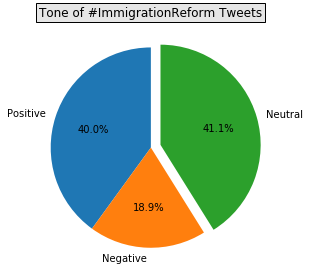

In [57]:
# Create pie chart of Tone for #ImmigrationReform Tweets 
p=plt.pie(
    counts['Count'],
    labels=label,
    # with no shadows
    shadow=False,
    # with one slide exploded out
    explode=(0, 0, 0.1),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

#Added details (including title)
plt.title('Tone of #ImmigrationReform Tweets', bbox={'facecolor':'0.9', 'pad':3})
plt.tight_layout()
plt.show()

**Figure 4**

Looking at the entirety of the #ImmigrationReform tweets, it seems that the majority (41.1%) held a neutral tone concerning the topic, while 40% had a positive tone and 18.9% had a negative one. This presents a different breakdown than I expected, with a far more neutral and positive tone to the discussion than negative. This could suggest that with respect to the #ImmigrationReform narrative, the conversation tone of average citizens is in fact more positive than the negative political climate would indicate. 

That said, there are some limitations to this analysis that may not result in that conclusion. Specifically, the exact dictionary that determines whether certain words are positive or negative (in terms of their polarity score), is not foolproof. A word such as 'family' may have a more positive score, but it could be used in a negative context. For instance, in 'help my family', 'help' and 'family' may be seen as positive but the overall sentence is clearly negative. Thus, the final tone or polarity score would not accurately capture the true sense of the sentence. 


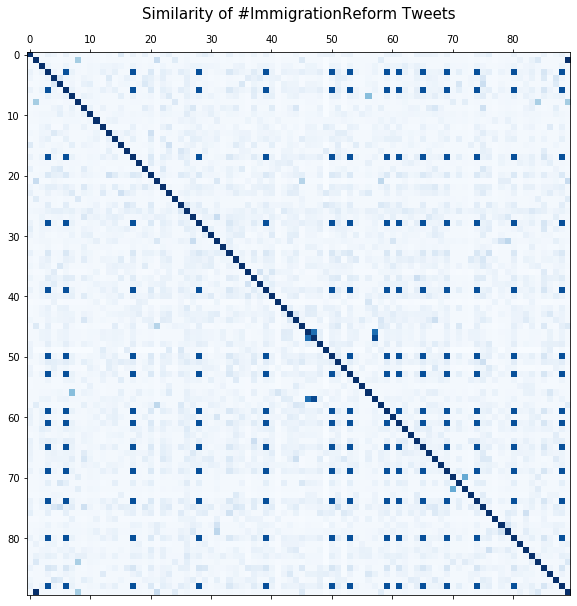

In [58]:
#creating vectorizer
cv=TfidfVectorizer()

#finding TF-IDF for all #ImmigrationReform tweets' text
text_t = cv.fit_transform(immNLP["text"])

#turning it into an array in order to compute cosine similarity
a = text_t.toarray()

#computing cosine similarity
index = cosine_similarity(a)

#plotting
fig, ax = plt.subplots(figsize=(15,10))

#adding title
plt.title('Similarity of #ImmigrationReform Tweets', fontsize=15)

ax.matshow(index, cmap='Blues');

**Figure 5**

In examining the cosine similiarity of each tweets' text, Figure 5 demonstrates that there is no clustering of the tweets content according to a specific pattern (i.e. all the tweets concerning #ImmigrationReform sound generally different or do not use precisely the same language). However, there are a few seemingly random tweets that share a large similarity across their content and language. This appears to be the 6th tweet, 16th tweet, 26th tweet and so on in the data. From my time looking at the raw data, I believe this particular occurence was due to a series of similar tweets being posted over time from the Houston area, occasionally from the same account. However, each tweet was still original, in that it was not a retweet, and simply reflected a repeated message concerning immigration reform that individuals wanted to stress.


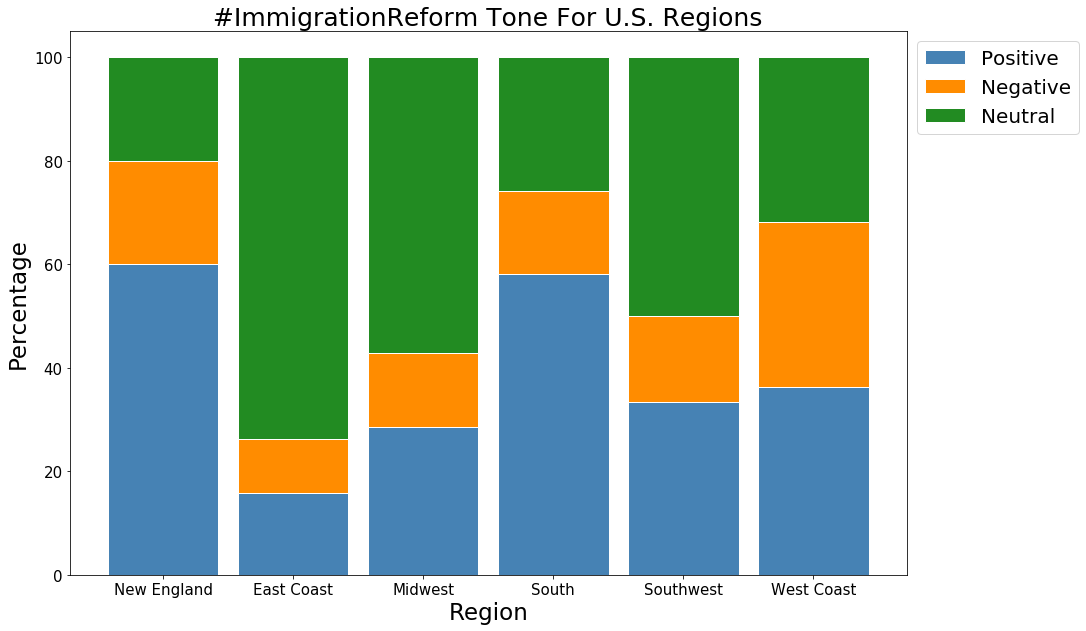

In [59]:
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(reg_count['Positive'], reg_count['Negative'], reg_count['Neutral'])]
pos_v = [i / j * 100 for i,j in zip(reg_count['Positive'], totals)]
neg_v = [i / j * 100 for i,j in zip(reg_count['Negative'], totals)]
neu_v = [i / j * 100 for i,j in zip(reg_count['Neutral'], totals)]
 
#plotting
barWidth = 0.85

regions=['New England', 'East Coast', 'Midwest', 'South', 'Southwest', 'West Coast']

fig, ax= plt.subplots(figsize=(15,10))
# Create positive bar
p1=plt.bar(regions, pos_v, color='steelblue', edgecolor='white', width=barWidth)
# Create negative bar
p2=plt.bar(regions, neg_v, bottom=pos_v, color='darkorange', edgecolor='white', width=barWidth)
# Create neutral bar
p3=plt.bar(regions, neu_v, bottom=[i+j for i,j in zip(pos_v, neg_v)], color='forestgreen', edgecolor='white', width=barWidth)
 
#changing x and y axis
plt.xlabel("Region", fontsize=23)
plt.xticks(fontsize=15)
plt.ylabel("Percentage", fontsize=23)
plt.yticks(fontsize=15)

#add title
plt.title('#ImmigrationReform Tone For U.S. Regions', fontsize=25)

#adding legend
plt.legend((p1[0], p2[0], p3[0]), ('Positive', 'Negative', 'Neutral'), bbox_to_anchor=(1, 1), loc= 'best', fontsize=20)

# Show graphic
plt.show()


**Figure 6**

It seems, according to the above figure, that the regions of the U.S. with the highest proportion of positive sentiment surrounding immigration reform is New England and the South, (with each at or slightly below 60% of the tweets). The next most positive are the West Coast and the Southwest, with both around 30%, and then the Midwest and the East Coast, at 28% and 15% respectively.

However, it also appears that the West Coast has the highest proportion of negative sentiment, with also around 30%. New England then has the second most negative sentiment at 20%, while the South and Southwest each have roughly 15%, the Midwest has 13% and the East Coast has around 10%. 

Thus, though the West Coast has a sizable proportion of positive sentiment surrounding immigration reform, there is also an equally significant portion that uses a negative tone with respect to the debate.

### 2.6) Sentiment Analysis of Official GOP and Democrat Tweets

#### 2.6.1) Dataset for Sentiment Analysis of Official GOP and Dem Tweets

For both the GOP and the Democrats, their most recent tweets were scraped from their official Twitter accounts. For the GOP, 3236 observations/tweets were collected and 3205 were scraped for the Democrats. Each observation comprised the exact time the tweet was created and its text. Three additional variables were manually added to the observations as well, once they were in a dataframe: polarity, subjectivity, and tone.

Polarity and subjectivity are simply numerical measures, with the former representing the overall sentiment of the language used as measured from -1 (negative) to 1 (positive). Subjectivity is just that, how subjective the tweet is according to its langauage on a scale from 0 (objective) to 1 (very subjective). Tone is a categorical variable for the tweet's polarity, with anything below 0 seen as 'negative' and above 0 'positive', while 0 itself is seen as 'neutral'.

#### 2.6.2) Scraping the Twitter Data From Each Account

In [60]:
##function to scrape most recent tweets from a Twitter handle
def get_all_tweets(screen_name):

    #setting up api
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    #initialize list to hold the tweets
    alltweets = []

    #make initial request for most recent tweets
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)

    #saving most recent tweets
    alltweets.extend(new_tweets)

    #saving the id of the oldest tweet less than one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
    
        #making new requests wihtout duplicates (the max_id set to oldest does this)
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

        #saving most recent tweets
        alltweets.extend(new_tweets)

        #saving the id of the oldest tweet less than one
        oldest = alltweets[-1].id - 1
    
    #transforming the tweets into a 2D array for the csv
    outtweets = [[tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]

    #write the csv (only ONCE)
    with open('%s_tweets.csv' % screen_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["created_at","text"])
        writer.writerows(outtweets)

    pass


In [61]:
#Only run once to create csv
#as the function writes the csv file
#it does NOT append

# #Twitter API credentials for new code
# consumer_key = creds['CONSUMER_KEY']
# consumer_secret = creds['CONSUMER_SECRET']
# access_key = creds['ACCESS_TOKEN']
# access_secret = creds['ACCESS_SECRET']

##getting just tweets from GOP and Democrats official handles
#get_all_tweets("GOP")
#get_all_tweets("TheDemocrats")

**Note**: the get_all_tweets() function calls were commented out in order to prevent the original csv from being changed should 'run all cells' be accidentally selected. The original code was run in a separate document and was only added here in order to show how the tweets were scraped.

#### 2.6.3) Sentiment Analysis of All GOP and Democrat Tweets

In [62]:
##reading the csv files
gop=pd.read_csv('GOP_tweets.csv')
dems=pd.read_csv('TheDemocrats_tweets.csv')

gop['polarity']=gop.apply(pol, axis=1)
gop['subjectivity']=gop.apply(sub, axis=1)
dems['polarity']=dems.apply(pol, axis=1)
dems['subjectivity']=dems.apply(sub, axis=1)

#calculating tone
gop['tone']=gop.apply(tone, axis=1)
dems['tone']=dems.apply(tone, axis=1)


In [63]:
#note: gop tweets only go to June 27th, 2019
gop.tail()

#note: dems tweets go to January 24th, 2019
dems.tail()

,created_at,text,polarity,subjectivity,tone
3200,2019-01-24 23:52:11,b'Los dem\xc3\xb3cratas est\xc3\xa1n trabajand...,0.000,0.000000,neutral
3201,2019-01-24 22:39:00,b'Hundreds of thousands of workers will miss a...,0.000,0.000000,neutral
3202,2019-01-24 21:13:11,"b'File under: ""You can\'t make this stuff up.""...",0.000,0.000000,neutral
3203,2019-01-24 20:30:43,"b""It's clear the multimillionaires in Trump's ...",0.100,0.383333,positive
3204,2019-01-24 20:26:59,b'RT @RepKatieHill: The people\xe2\x80\x99s Ho...,0.125,0.166667,positive


**Note**: There is an uneven timeline of tweets for each account. As the function simply pulls the most recent, roughly, 3200 tweets from a particular Twitter handle, if one account simply tweets more per day than another, then that account may have tweets only until a more recent date rather than one that tweets sporadically. As such, the GOP only has scraped tweets from June 27th, 2019 while the Democrats them from as far as January 24th, 2019. 

#### 2.6.4) Visualization of GOP and Democrat Tweet Sentiment on Impeachment

In [64]:
##SUBSETTING ACCORDING TO DAY OF IMPEACHMENT
img=gop[94:130]
imd=dems[26:38]

img.head()
imd.head()

,created_at,text,polarity,subjectivity,tone
26,2019-12-18 23:16:05,b'Tomorrow is the 6\xef\xb8\x8f\xe2\x83\xa3th ...,0.0000,0.000000,neutral
27,2019-12-18 22:12:06,b'RT @HouseDemocrats: The facts are clear. You...,0.1000,0.383333,positive
28,2019-12-18 21:08:05,b'We\xe2\x80\x99re proud of @TomPerez for help...,0.5875,0.875000,positive
29,2019-12-18 20:04:05,b'We stand with @HouseDemocrats. #DefendOurDem...,0.0000,0.000000,neutral
30,2019-12-18 19:00:08,b'Feels like a good day to check your voter re...,0.7000,0.600000,positive


In [65]:
#creating histograms of GOP and Democrat tones
fig = go.Figure()
fig.add_trace(go.Histogram(x=img['tone'], name='GOP', marker_color='firebrick'))
fig.add_trace(go.Histogram(x=imd['tone'], name='Democrats', marker_color='dodgerblue'))

#putting histograms together
fig.update_layout(title_text='Impeachment Tone Distributon',
                  xaxis_title_text='Tone',
                  yaxis_title_text='Count')
fig.show()


**Figure 7**

In the above figure, we can see a general breakdown of the tones used by each political party on the day of the impeachment. It is clear that the GOP (the party of the impeached president) had far more tweets with negative language, 12, than the Democrats, just 1. This is in line with expectations given the Republican/GOP's official view that the impeachment is uncalled for. Additionally, it should be noted that each party had the same number of positive tweets concerning the impeachment, 5, which goes against immediate assumptions that the Democrats would meet the news with more positivity than the Republicans. However, perhaps a reason for this equality is that the Republicans responded to the news, at times, by highlighting what they view as positive effects of Trump's presidency, and thereby using language that would have a high polarity score and thus convey a positive tone. It is also important to mention that the GOP has a much higher number of neutral tweets than the Democrats, 19 to 6.

As the GOP has a much higher number of tweets than the Democrats from this day, (36 compared to 12), it is also worth examining the tone of the tweets by percentages:

#### GOP:
* 33% negative
* 13.88% positive
* 52.77% neutral

#### Democrat:
* 8.33% negative
* 41.66% positive
* 50% neutral

In this way, we can see that the GOP still has a much larger proportion of negative tweets than the Democrats, while the Democrats have much more positive tweets relatively speaking. As such, this corroborates the expectation that the GOP had a much more negative reaction to the impeachment news than the Democrats, while the latter hailed the news. An unexpected part of the results, however, was the sizable number of neutral tweets from both parties. I was expecting a fairly split analysis whereby over 50% of the GOP's tweets would be negative, while over 50% of the Democrats' tweets would be positive. Instead, each party has a healthly amount of neutral and even positive and negative tweets; thus suggesting that the response, though polarized, was not as completely polarized as expected.


## Part 3: Conclusions


With respect to the original research questions regarding intercommunication among Americans of different geographic backgrounds, it seems that there is some occurring within the current political discourse. In the #ImmigrationReform discussion, individuals from various different regions in the U.S. contributed their thoughts, though some areas closer to borders and larger cities seemed to do so to a larger degree. However, that latter element could be influenced by the demographics of Twitter which would naturally have more users, and thereby potential conversationalists, in more populated areas. Additionally, the sentiment of the discussion was more positive in New England and the South than other areas, while the West Coast was the most negative, proportionally speaking. 

As for the official tweets by the Democrats and Republicans surrouding the day of impeachment, the latter had a much higher proportion of negative tweets (33%) compared to the Democrats at 8.33%. While the Democrats had a higher level of positive tweets at 41.66% than the Republicans at 13.88%. Both of which follow expectations as the Republicans are the party of the impeached president, and therefore have a more negative view of the news, while the Democrats were pushing for the impeachment and thus were more positive.

Though the study does accumulate some understanding of intercommunication and diversity, geographically speaking, among Americans concerning the immigration reform debate, this is just the starting point of a larger analysis. Specifically, this work can be expanded on by examining the direct communication between individuals in differing locations through scraping their replies to one another with respect to immigration reform. Thus, a deeper analysis wherein an adjacency matrix is created showcasing the communication between particular cities is possible.

It would also be interesting to analyze the tone used, with respect to immigration reform, on a different social media platform other than Twitter in order to study whether one site is considered more negative or positive than the other. Additionally, as I only examined one debate within American politics, (aside from the reaction to the impeachment announcement), it would be worthwhile to apply the same NLP analysis to another topic and examine whether immigration reform or the other is more divisive/negative in terms of tone.

## Citations

"A Python Script to Download all the Tweets of a Hashtag into a CSV" (2017). Quian, Vicky. https://gist.github.com/vickyqian/f70e9ab3910c7c290d9d715491cde44c

"A Script to Download all of a User's Tweets into a CSV" (2013). Yanofsky, David. https://gist.github.com/yanofsky/5436496 

"Percent Stacked Barplot" (2017). Gaudard, Olivier. https://python-graph-gallery.com/13-percent-stacked-barplot/